<h1>Emcee Ensemble Sampling Method Tests</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from chain_analysis import contour_plot, gelman_rubin

plt.rcParams['figure.figsize']=(7,6)
plt.style.use('seaborn-whitegrid')

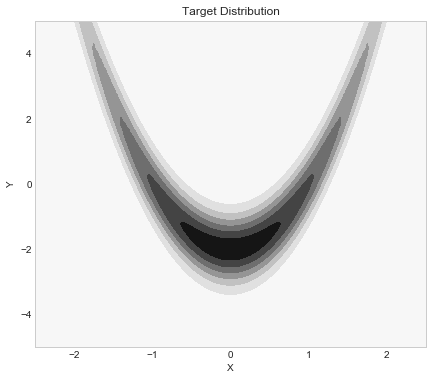

In [2]:
# Looking at a target distribution
X,Y = np.meshgrid(np.linspace(-2.5,2.5,101),np.linspace(-5.0,5.0,101))
distrib = np.exp(-(X**2/4.0+(Y-2*X**2+2.0)**2))

plt.contourf(X[0,:],Y[:,0],distrib)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Target Distribution')
#plt.savefig('target_distrib.png')

In [3]:
# Log Likelihood
def lnlkl(p):
    model = -(p[0]**2/4.0+(p[1]-2*p[0]**2+2.0)**2)
    return model

In [4]:
# Log Priors
def lnprior_x(x):
    if -2.5 < x < 2.5:
        return 0.0
    return -np.inf

def lnprior_y(y):
    if -5.0 < y < 5.0:
        return 0.0
    return -np.inf

In [5]:
# Log Probability
def lnprob(p):
    lpx = lnprior_x(p[0])
    lpy = lnprior_y(p[1])
    if not np.isfinite(lpx) or not np.isfinite(lpy):
        return -np.inf
    return lpx + lpy + lnlkl(p)

<h3>50 Walkers - 2000 Steps - high initial dispersion</h3>

In [10]:
### Ensemble method parameters
ndim=2
n_walker=50
n_steps=2000
pos0 = np.c_[np.random.rand(n_walker)-0.5,np.random.rand(n_walker)-2.5]

# Running the sampler ; burn first 20 steps
sampler = emcee.EnsembleSampler(n_walker, ndim, lnprob)
pos, _, _ = sampler.run_mcmc(pos0 = pos0 , N=20)
sampler.reset()
_=sampler.run_mcmc(pos0 = pos , N=n_steps)

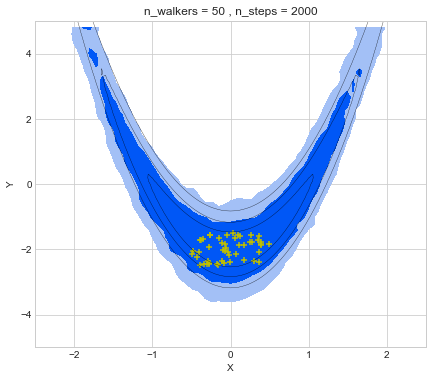

In [11]:
contour_plot.contour(sampler.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1], smooth=2e5)
plt.contour(X[0,:],Y[:,0],distrib,3,colors='k',linewidths=0.3)
plt.scatter(pos0[:,0],pos0[:,1],marker='+',color='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('n_walkers = {} , n_steps = {}'.format(n_walker,n_steps))
#plt.savefig('nwalk{}_nsteps{}.png'.format(n_walker,n_steps))

<h3>2000 Walkers - 50 Steps - high initial dispersion</h3>

In [12]:
### Ensemble method parameters
ndim=2
n_walker=2000
n_steps=50
pos0 = np.c_[np.random.rand(n_walker)-0.5,np.random.rand(n_walker)-2.5]

# Running the sampler ; burn first 20 steps
sampler = emcee.EnsembleSampler(n_walker, ndim, lnprob)
pos, _, _ = sampler.run_mcmc(pos0 = pos0 , N=20)
sampler.reset()
_=sampler.run_mcmc(pos0 = pos , N=n_steps)

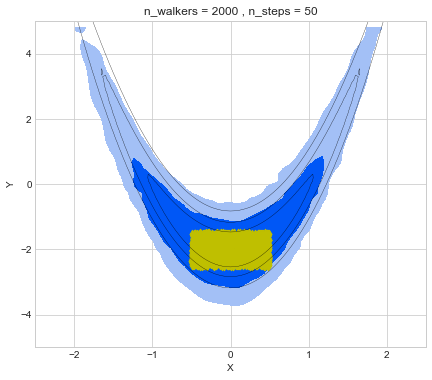

In [13]:
contour_plot.contour(sampler.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1], smooth=2e5)
plt.contour(X[0,:],Y[:,0],distrib,3,colors='k',linewidths=0.3)
plt.scatter(pos0[:,0],pos0[:,1],marker='d',color='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('n_walkers = {} , n_steps = {}'.format(n_walker,n_steps))
#plt.savefig('nwalk{}_nsteps{}.png'.format(n_walker,n_steps))

<h3>50 Walkers - 2000 Steps - low initial dispersion</h3>

In [14]:
### Ensemble method parameters
ndim=2
n_walker=50
n_steps=2000
pos0 = np.c_[(np.random.rand(n_walker)-0.5)/10.0,(np.random.rand(n_walker)-0.5)/10.0 -2.0]

# Running the sampler ; burn first 20 steps
sampler = emcee.EnsembleSampler(n_walker, ndim, lnprob)
pos, _, _ = sampler.run_mcmc(pos0 = pos0 , N=20)
sampler.reset()
_=sampler.run_mcmc(pos0 = pos , N=n_steps)

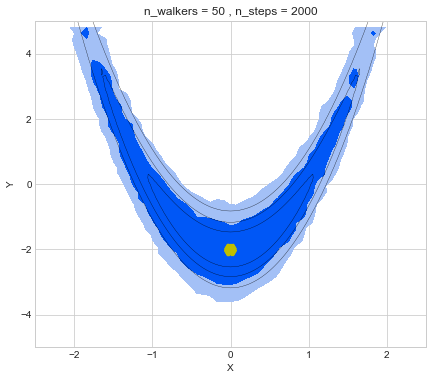

In [15]:
contour_plot.contour(sampler.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1], smooth=2e5)
plt.contour(X[0,:],Y[:,0],distrib,3,colors='k',linewidths=0.3)
plt.scatter(pos0[:,0],pos0[:,1],marker='d',color='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('n_walkers = {} , n_steps = {}'.format(n_walker,n_steps))
#plt.savefig('nwalk{}_nsteps{}_bis.png'.format(n_walker,n_steps))

<h3>2000 Walkers - 50 Steps - low initial dispersion</h3>

In [16]:
### Ensemble method parameters
ndim=2
n_walker=2000
n_steps=50
pos0 = np.c_[(np.random.rand(n_walker)-0.5)/10.0,(np.random.rand(n_walker)-0.5)/10.0 -2.0]

# Running the sampler ; burn first 20 steps
sampler = emcee.EnsembleSampler(n_walker, ndim, lnprob)
pos, _, _ = sampler.run_mcmc(pos0 = pos0 , N=20)
sampler.reset()
_=sampler.run_mcmc(pos0 = pos , N=n_steps)

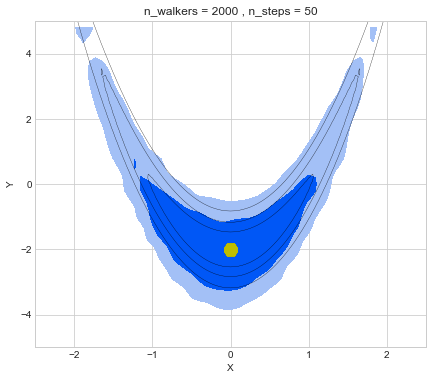

In [17]:
contour_plot.contour(sampler.chain[:,:,:].reshape([n_walker*n_steps,2]), [0,1], smooth=2e5)
plt.contour(X[0,:],Y[:,0],distrib,3,colors='k',linewidths=0.3)
plt.scatter(pos0[:,0],pos0[:,1],marker='d',color='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('n_walkers = {} , n_steps = {}'.format(n_walker,n_steps))
#plt.savefig('nwalk{}_nsteps{}_bis.png'.format(n_walker,n_steps))